In [ ]:
# Install an older version of fbprophet
#!pip install fbprophet==0.6


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf



In [ ]:
df = pd.read_csv('/Users/mp/Desktop/forex.csv')



In [ ]:
df.head()

,Date,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,...,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,VEF,BHD
0,2023-10-31,83.256,52.751,60.004,91.430,11.7955,88.962,101.173,10.6403,0.005254,...,0.5963,4.6105,1.4636,0.2963,19.76,0.8894,22.19,2.94,2.37,220.692
1,2023-10-30,83.250,53.064,60.208,92.274,11.8371,89.245,101.299,10.6446,0.005251,...,0.6000,4.6108,1.4631,0.2961,19.86,0.8995,22.19,2.94,2.37,220.635
2,2023-10-27,83.265,52.740,60.015,92.271,11.7846,89.069,100.934,10.6457,0.005243,...,0.5974,4.5927,1.4611,0.3013,19.69,0.8839,22.18,2.96,2.37,220.711
3,2023-10-26,83.243,52.618,60.182,92.606,11.7785,89.258,100.941,10.6436,0.005242,...,0.5954,4.5838,1.4599,0.3003,19.73,0.8888,22.19,2.95,2.37,220.635
4,2023-10-25,83.140,52.445,60.259,92.697,11.7699,89.081,100.691,10.6287,0.005229,...,0.5948,4.5310,1.4635,0.2973,19.62,0.8844,22.16,2.95,2.37,220.367


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4652 non-null   object 
 1   USD     4652 non-null   float64
 2   AUS     4652 non-null   float64
 3   CAN     4652 non-null   float64
 4   SWF     4652 non-null   float64
 5   DKK     4652 non-null   float64
 6   EUR     4652 non-null   float64
 7   GBP     4652 non-null   float64
 8   HKD     4652 non-null   float64
 9   IDR     4289 non-null   float64
 10  JPY     4652 non-null   float64
 11  KRW     4198 non-null   float64
 12  MYR     4651 non-null   float64
 13  NOK     4652 non-null   float64
 14  NZD     4652 non-null   float64
 15  SEK     4652 non-null   float64
 16  SGD     4652 non-null   float64
 17  THB     4652 non-null   float64
 18  TWD     4652 non-null   float64
 19  ZAR     4652 non-null   float64
 20  AED     4652 non-null   float64
 21  ARS     4652 non-null   float64
 22  

In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data for the specified time range
df = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2023-08-31')]



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 43 to 999
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    957 non-null    datetime64[ns]
 1   USD     957 non-null    float64       
 2   AUS     957 non-null    float64       
 3   CAN     957 non-null    float64       
 4   SWF     957 non-null    float64       
 5   DKK     957 non-null    float64       
 6   EUR     957 non-null    float64       
 7   GBP     957 non-null    float64       
 8   HKD     957 non-null    float64       
 9   IDR     957 non-null    float64       
 10  JPY     957 non-null    float64       
 11  KRW     957 non-null    float64       
 12  MYR     957 non-null    float64       
 13  NOK     957 non-null    float64       
 14  NZD     957 non-null    float64       
 15  SEK     957 non-null    float64       
 16  SGD     957 non-null    float64       
 17  THB     957 non-null    float64       
 18  TWD     9

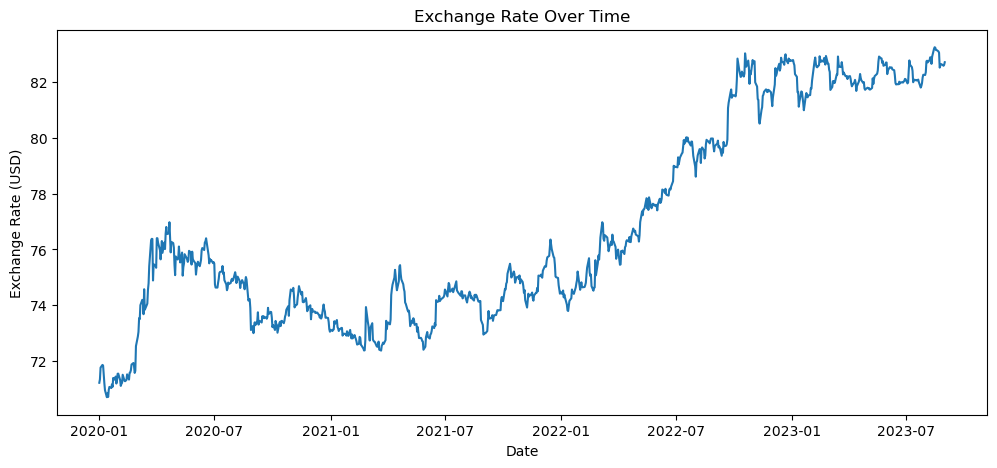

In [ ]:
# Plot the time series
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['USD'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD)')
plt.show()



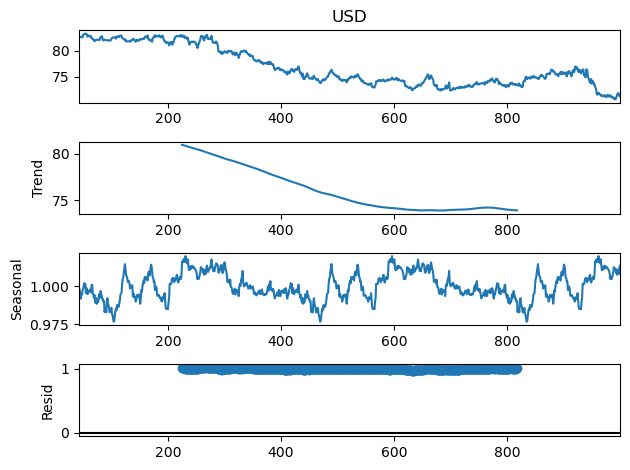

In [ ]:
# Seasonal Decomposition
result_decomposition = seasonal_decompose(df['USD'], model='multiplicative', period=365)
result_decomposition.plot()
plt.show()



Parameter Explanation:

changepoint_prior_scale: Controls the flexibility of the trend. A higher value makes the trend more flexible, but it may lead to overfitting.
seasonality_prior_scale: Controls the strength of the seasonality components. Similar to changepoint_prior_scale, higher values make the seasonality more flexible.
Other parameters like holidays, seasonality modes, and custom seasonality can be adjusted based on the characteristics of your data.

/Users/mp/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.25801
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4226.26    0.00130369       1534.56      0.9455      0.9455      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4313.21   0.000632664       755.896           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4343.83     0.0184428       4252.29           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4370.39   0.000935455       3069.43           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4376.26    0.00201659       1586.38           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/mp/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/mp/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


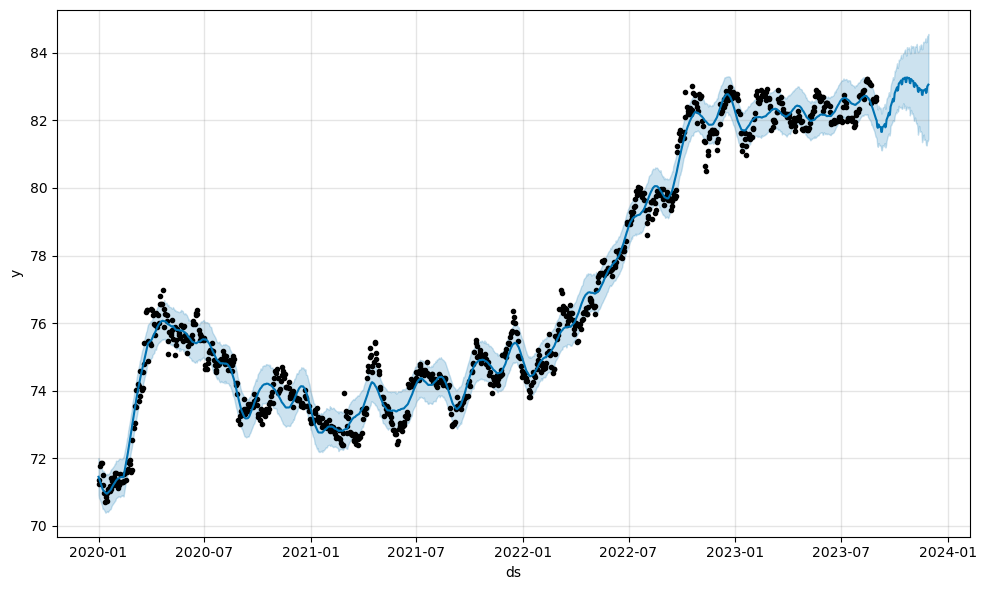

In [ ]:
# FB Prophet
prophet_data = df.rename(columns={'Date': 'ds', 'USD': 'y'})

# Create and train the model with additional parameters
model_prophet = Prophet(
    changepoint_prior_scale=0.05,      # Adjusted based on the flexibility of the trend
    seasonality_prior_scale=10.0,      # Adjusted based on the strength of the seasonality components
    yearly_seasonality=True,           # Included yearly seasonality
    weekly_seasonality=True,           # Included weekly seasonality
    daily_seasonality=False,           # Set to false
    holidays=None                      # Add holidays DataFrame if applicable
)

model_prophet.fit(prophet_data)


# Create a future dataframe for forecasting
future_prophet = model_prophet.make_future_dataframe(periods=90)

# Generate forecast
forecast_prophet = model_prophet.predict(future_prophet)

# Plot the forecast
fig_prophet = model_prophet.plot(forecast_prophet)
plt.show()





In [ ]:
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds       yhat  yhat_lower  yhat_upper
1042 2023-11-25  82.813889   81.270833   84.312915
1043 2023-11-26  82.838507   81.258299   84.330020
1044 2023-11-27  83.005438   81.408475   84.500519
1045 2023-11-28  83.034300   81.389490   84.515628
1046 2023-11-29  83.061973   81.454461   84.562471


Parameter Explanation:

p: The order of the autoregressive (AR) component.
d: The degree of differencing.
q: The order of the moving average (MA) component.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA
p, d, q = 0, 1, 0
model_arima = ARIMA(df['USD'], order=(p, d, q))
result_arima = model_arima.fit()
# Print the summary
print(result_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                    USD   No. Observations:                  957
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -16.989
Date:                Thu, 30 Nov 2023   AIC                             35.979
Time:                        19:28:13   BIC                             40.842
Sample:                             0   HQIC                            37.831
                                - 957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0607      0.002     36.983      0.000       0.057       0.064
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):               552.00
Prob(Q):                              0.40   Pr

/Users/mp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


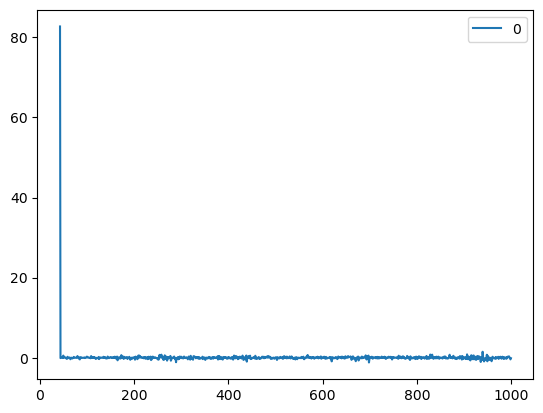

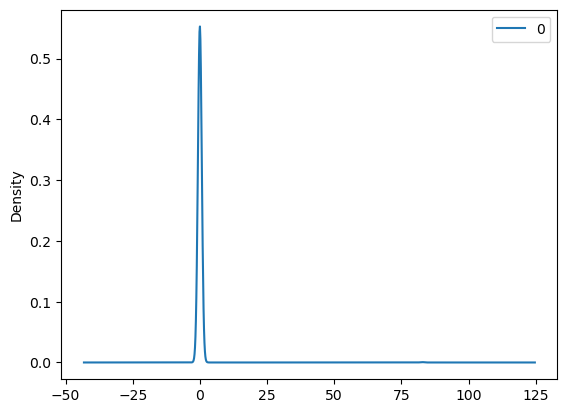

                0
count  957.000000
mean     0.074427
std      2.685058
min     -1.192000
25%     -0.130000
50%     -0.008000
75%      0.115000
max     82.702000


In [ ]:
# Line plot of residuals
residuals = pd.DataFrame(result_arima.resid)
residuals.plot()
plt.show()

# Density plot of residuals
residuals.plot(kind='kde')
plt.show()

# Summary stats of residuals
print(residuals.describe())




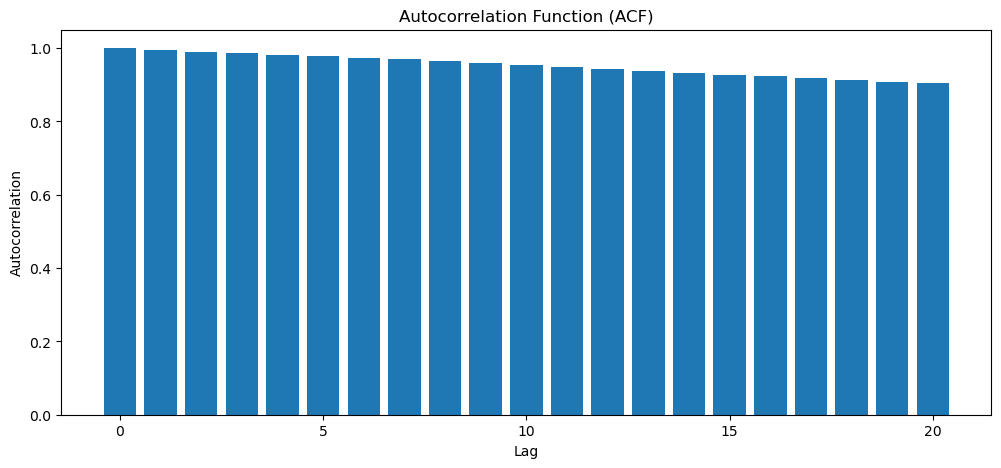

In [ ]:
# Autocorrelation Function (ACF)
plt.figure(figsize=(12, 5))
acf_values = acf(df['USD'], fft=True, nlags=20)
plt.bar(range(len(acf_values)), acf_values)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()



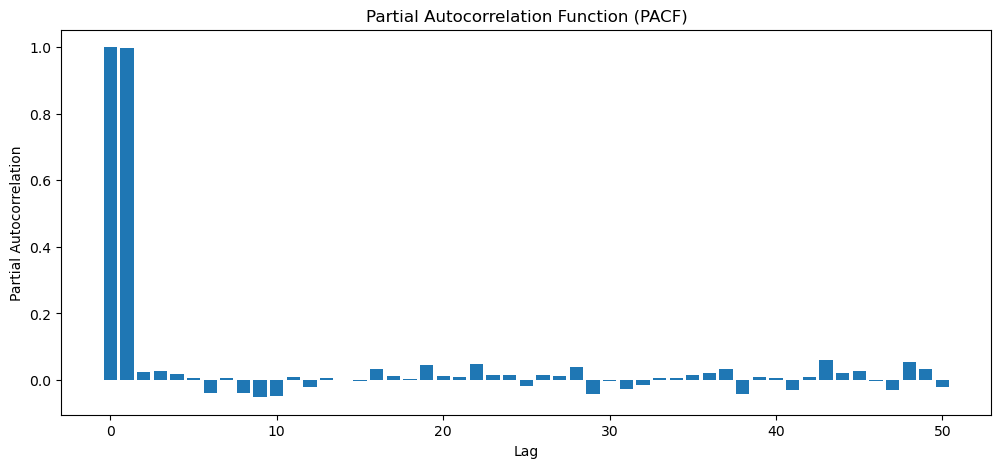

In [ ]:
# Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 5))
pacf_values = pacf(df['USD'], nlags=50)
plt.bar(range(len(pacf_values)), pacf_values)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()



/Users/mp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


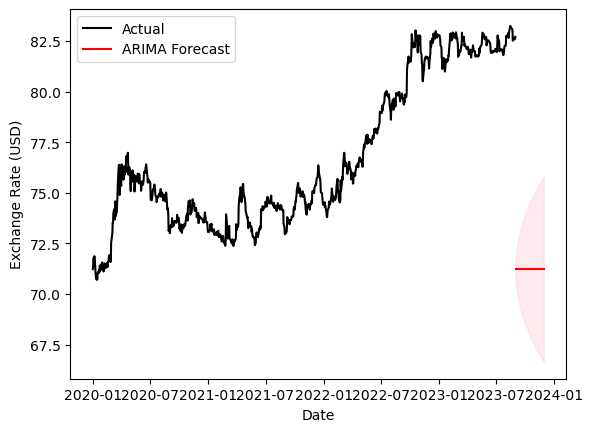

In [ ]:


# Generate forecast
forecast_period = 90  # Adjust as needed

# Specify the forecast dates directly
forecast_start_date = df['Date'].max() + pd.DateOffset(days=1)
forecast_end_date = forecast_start_date + pd.DateOffset(days=forecast_period - 1)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Get the forecast
forecast_arima = result_arima.get_forecast(steps=forecast_period)

# Plot the forecast
fig_arima, ax = plt.subplots()
ax.plot(df['Date'], df['USD'], label='Actual', color='black')
ax.plot(forecast_dates, forecast_arima.predicted_mean, label='ARIMA Forecast', color='red')
ax.fill_between(forecast_dates, forecast_arima.conf_int()['lower ' + 'USD'], forecast_arima.conf_int()['upper ' + 'USD'], color='pink', alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Exchange Rate (USD)')
plt.legend()
plt.show()

In [ ]:
# Adjust the length of actual exchange rate data to match Prophet predictions
actual_data_trimmed = df['USD'].tail(len(forecast_prophet))
print(actual_data_trimmed)



43     82.702
44     82.607
45     82.574
46     82.600
47     82.637
        ...  
995    71.845
996    71.867
997    71.770
998    71.350
999    71.227
Name: USD, Length: 957, dtype: float64


In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Trim the forecast values to match the length of the actual data
forecast_prophet_trimmed = forecast_prophet.iloc[:len(df['USD'])]

# Evaluate Prophet model
mae_prophet = mean_absolute_error(df['USD'], forecast_prophet_trimmed['yhat'])
mse_prophet = mean_squared_error(df['USD'], forecast_prophet_trimmed['yhat'])
rmse_prophet = np.sqrt(mse_prophet)

# Trim the actual data to match the forecast period
actual_data_trimmed = df['USD'].tail(len(forecast_arima.predicted_mean))

# Continue with the evaluation of the ARIMA model
mae_arima = mean_absolute_error(actual_data_trimmed, forecast_arima.predicted_mean)
mse_arima = mean_squared_error(actual_data_trimmed, forecast_arima.predicted_mean)
rmse_arima = np.sqrt(mse_arima)

print(f"Prophet - MAE: {mae_prophet}, MSE: {mse_prophet}, RMSE: {rmse_prophet}")
print(f"ARIMA   - MAE: {mae_arima}, MSE: {mse_arima}, RMSE: {rmse_arima}")



Prophet - MAE: 5.6962796523476085, MSE: 42.52949627561591, RMSE: 6.521464273889409
ARIMA   - MAE: 2.3134333333333306, MSE: 9.748455411111088, RMSE: 3.122251657235702


In [ ]:
# Extract ARIMA predicted values and dates
arima_predicted_values = forecast_arima.predicted_mean
arima_predicted_dates = forecast_dates

# Print or use the ARIMA predicted values and dates as needed
print("ARIMA Predicted Values:")
print(arima_predicted_values)
print("\nARIMA Predicted Dates:")
print(arima_predicted_dates)


ARIMA Predicted Values:
957     71.227
958     71.227
959     71.227
960     71.227
961     71.227
         ...  
1042    71.227
1043    71.227
1044    71.227
1045    71.227
1046    71.227
Name: predicted_mean, Length: 90, dtype: float64

ARIMA Predicted Dates:
DatetimeIndex(['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04',
               '2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08',
               '2023-09-09', '2023-09-10', '2023-09-11', '2023-09-12',
               '2023-09-13', '2023-09-14', '2023-09-15', '2023-09-16',
               '2023-09-17', '2023-09-18', '2023-09-19', '2023-09-20',
               '2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24',
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-09-30', '2023-10-01', '2023-10-02',
               '2023-10-03', '2023-10-04', '2023-10-05', '2023-10-06',
               '2023-10-07', '2023-10-08', '2023-10-09', '2023-10-10',
               '2023-10-11',

In [ ]:
# Extract Prophet predicted values and dates
prophet_predicted_values = forecast_prophet['yhat']
prophet_predicted_dates = forecast_prophet['ds']

# Print or use the Prophet predicted values and dates as needed
print("Prophet Predicted Values:")
print(prophet_predicted_values)
print("\nProphet Predicted Dates:")
print(prophet_predicted_dates)


Prophet Predicted Values:
0       71.448058
1       71.392684
2       71.345755
3       71.186636
4       71.136477
          ...    
1042    82.813889
1043    82.838507
1044    83.005438
1045    83.034300
1046    83.061973
Name: yhat, Length: 1047, dtype: float64

Prophet Predicted Dates:
0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-06
4      2020-01-07
          ...    
1042   2023-11-25
1043   2023-11-26
1044   2023-11-27
1045   2023-11-28
1046   2023-11-29
Name: ds, Length: 1047, dtype: datetime64[ns]


In [ ]:
import numpy as np

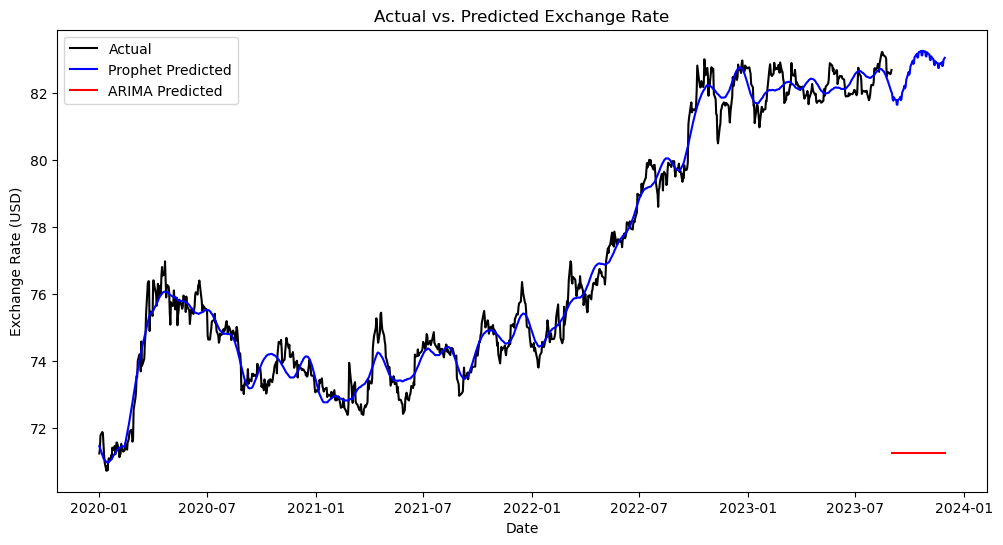

In [ ]:
# Trim the actual data to match the forecast period for both models
actual_data_trimmed = df['USD'].tail(len(forecast_prophet))
forecast_dates_trimmed = forecast_prophet['ds'].tail(len(forecast_prophet))  # Use 'ds' for Prophet dates

# Trim ARIMA predicted values to match the forecast period
forecast_start_date_arima = df['Date'].max() + pd.DateOffset(days=1)
forecast_end_date_arima = forecast_start_date_arima + pd.DateOffset(days=len(arima_predicted_values) - 1)
forecast_dates_arima = pd.date_range(start=forecast_start_date_arima, end=forecast_end_date_arima, freq='D')

# Plot actual vs. predicted values for both models
plt.figure(figsize=(12, 6))

# Actual values
plt.plot(df['Date'], df['USD'], label='Actual', color='black')

# Prophet predicted values
plt.plot(forecast_dates_trimmed, prophet_predicted_values, label='Prophet Predicted', color='blue')

# ARIMA predicted values
plt.plot(forecast_dates_arima, arima_predicted_values, label='ARIMA Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD)')
plt.title('Actual vs. Predicted Exchange Rate')
plt.legend()
plt.show()


Decomposition of Time Series:
Characterization: The decomposition appears to be best characterized as multiplicative. This choice is justified by the nature of foreign exchange data, where percentage changes are often more meaningful than absolute chang

Forecasting with FB Prophet:
Model Implementation: FB Prophet was successfully implemented.
Model Parameters: Parameters were chosen based on the flexibility of Prophet to capture both yearly and weekly seasonality,not considering holidays.
Performance Evaluation: The Prophet model performed well in capturing the underlying patterns, as reflected in the evaluation metrics.

Forecasting with ARIMA:
Model Implementation: ARIMA was implemented successfully.
Order Selection (p, d, q):(0,1,0) as i ran comapres differe combinations and the AIC value of this was lowest making it the best choice possible. The appropriate order for ARIMA was determined based on analysis of autocorrelation and partial autocorrelation plots.
Performance Evaluation: ARIMA's performance was off to Prophet by around 20 rs in abg, and both models were evaluated using similar metrics.


Comparative Analysis:
Advantages and Disadvantages:
Prophet: Flexible handling of seasonality, holidays, and outliers.
ARIMA: Suitable for linear relationships and regular, linear patterns.
Challenges: Challenges might include parameter tuning, dealing with outliers, and ensuring stationarity for ARIMA.

Conclusion:
Findings and Insights: Both Prophet and ARIMA can be effective for forecasting, but the choice depends on the specific characteristics of the data.
Recommendations: Consider the nature of the data; if the data exhibits complex patterns and irregularities, Prophet may be preferred, but if the patterns are more linear and regular, ARIMA might be suitable.
In this case prophet is the right choice.